## Quest 03: AARRR 분석/통계분석

---

### 1. 분석 상황

<!-- INFO 박스 -->
<div style="background-color:#e7f3fe; padding:10px; border-radius:5px; border-left: 5px solid #2196F3;">
ℹ️ <b>INFO</b><br>
문제 1 ~ 9 번: 여러분은 E-commere  플랫폼 기업에 입사했다. 데이터사이언티스트의 역할로 비즈니스 지표를 정의하고 분석보고서를 내는 프로젝트에 참여하게 되었다. 다음 문제들을 풀어보자.

AARRR을 포함한 **비즈니스 지표는 정답이 없으며 회사의 상황과 의사결정자의 판단에 따라 적절한 지표를 선택해주는 것이 중요**하다. 문제는 문제대로 풀되, AARRR 지표에 더 좋은 옵션이 있으면 추가적으로 고민하고 기술하면서 분석역량을 키워보는 것이 목표!
</div>


### 2. 데이터 설명

- 데이터 출처: https://archive.ics.uci.edu/dataset/502/online+retail+ii
|열|이름|설명|
|---|---|---|
|`InvoiceNo`	|인보이스(거래) 번호. 명목형. 6자리 정수. 거래마다 고유하게 부여됨. 'C'로 시작하면 취소된 거래를 의미함.|
|`StockCode`	|상품 코드. 명목형. 5자리 정수. 각각 다른 상품에 고유하게 부여된 번호.|
|`Description`	|상품 이름. 명목형. 상품의 이름/설명.|
|`Quantity`	|수량. 수치형. 거래당 해당 상품이 몇 개 팔렸는지.|
|`InvoiceDate`	|거래 일시. 수치형. 거래가 발생한 날짜와 시간.|
|`UnitPrice`	|단가. 수치형. 상품 1개당 가격 (단위: 영국 파운드 £).|
|`CustomerID`	|고객 번호. 명목형. 5자리 정수. 고객마다 고유하게 부여된 번호.|
|`Country`	|국가 이름. 명목형. 고객이 거주하는 국가 이름.|

### 3. 문제

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
file_path1 = 'C:/Users/daydr/Statistics/online_retail_20092010.csv'
file_path2 = 'C:/Users/daydr/Statistics/online_retail_20102011.csv'

# CSV 읽기
df1 = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)

# 데이터 확인
print(df1.head())
print(df2.head())

In [ ]:
online_retail = pd.concat([df1, df2], ignore_index=True)

online_retail.to_csv('C:/Users/daydr/Statistics/online_retail.csv', index=False)

#### 3-1. 데이터 로드 및 탐색

- **데이터의 첫 5개 행을 출력**하여 데이터 형식을 확인해라.
- **데이터프레임의 컬럼 정보**와 **결측치 여부**를 확인하고 전처리 전략을 고민해보자. 

In [15]:
# 데이터의 첫 5개 행을 출력하여 데이터 형식을 확인하자. 

online_retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 7:45,1.25,13085.0,United Kingdom


In [19]:
# 컬럼명과 자료형 확인

online_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [21]:
# 결측치 확인

online_retail.isna().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

- `Customer ID` -> 결측치 제거
- `InvoiceDate` -> 데이터 타입 바꾸기

#### 3-2. 데이터 전처리

- `InvoiceDate` 컬럼을 날짜 형식으로 변환하고, `Customer ID`에 결측치가 있는 행을 제거하자. 
- `Customer ID`를 정수형으로 변환한 후, `InvoiceDate`를 기준으로 데이터를 정렬하자.
- 금액을 나타내는 새로운 컬럼 `Total` 을 생성하라. (`Quantity`와 `Price`를 곱한 값).

In [25]:
# 날짜 형식 변환
online_retail['InvoiceDate'] = pd.to_datetime(online_retail['InvoiceDate'])

In [27]:
# 결측치 제거
online_retail = online_retail.dropna(subset = ['Customer ID'])
online_retail.isna().mean()

Invoice        0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
Price          0.0
Customer ID    0.0
Country        0.0
dtype: float64

In [29]:
# 정수형으로 변환 후 데이터 정렬
online_retail['Customer ID'] = online_retail['Customer ID'].astype(int)
online_retail = online_retail.sort_values(by='InvoiceDate')

# 새로운 컬럼 생성 (총 금액)
online_retail['Total'] = online_retail['Quantity'] * online_retail['Price']

In [31]:
online_retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0


#### 3-3. 나라별 구매 인원 시각화

`Country` 컬럼을 기준으로 `Customer ID`의 유니크한 값을 계산하여 나라별 구매 고객 수를 시각화 해보자. 

In [64]:
country_customers = online_retail.groupby('Country')['Customer ID'].nunique()
country_customers = country_customers.sort_values(ascending=False) # 정렬
country_customers

Country
United Kingdom          5410
Germany                  107
France                    95
Spain                     41
Belgium                   29
Portugal                  24
Netherlands               23
Switzerland               22
Sweden                    19
Italy                     17
Finland                   15
Australia                 15
Channel Islands           14
Norway                    13
Austria                   13
Denmark                   12
Cyprus                    11
Japan                     10
USA                        9
Unspecified                7
Poland                     6
Greece                     5
EIRE                       5
Canada                     5
Israel                     4
United Arab Emirates       4
Malta                      2
Bahrain                    2
Brazil                     2
RSA                        2
Korea                      2
Czech Republic             1
Iceland                    1
Lebanon                    1
Lithua

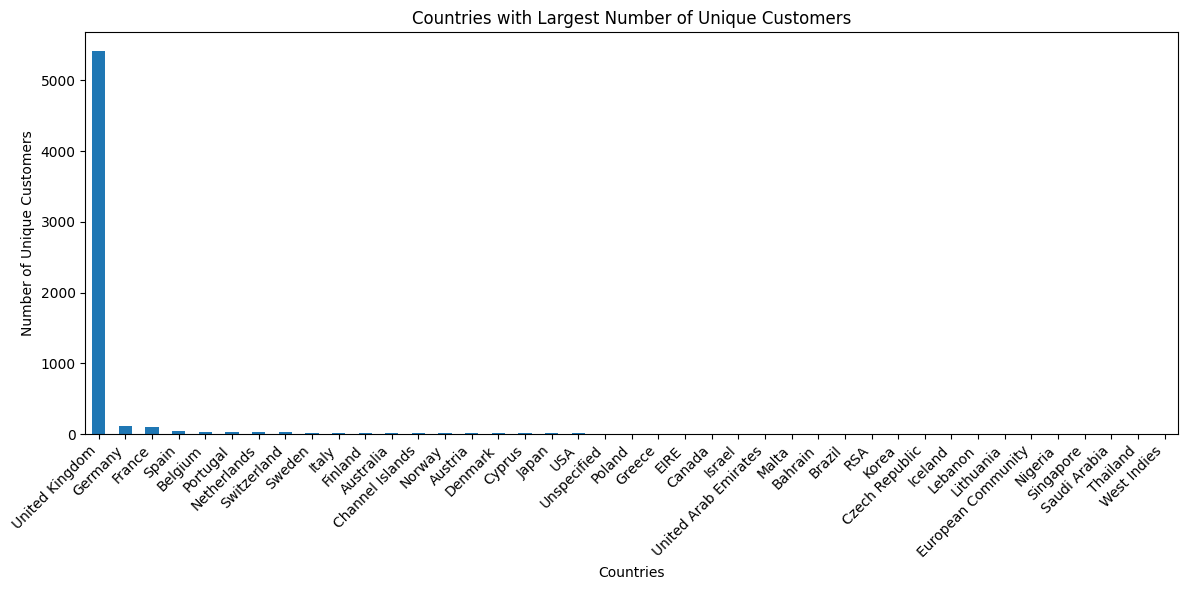

In [65]:
plt.figure(figsize=(12,6))
country_customers.plot(kind='bar')
plt.title('Countries with Largest Number of Unique Customers')
plt.xlabel('Countries')
plt.ylabel('Number of Unique Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### 3-4. Acquisition (고객 유입 분석)
- 신규 고객 분석을 위해 고객의 **첫 구매 시점**을 기준으로 월별 신규 유입 고객 수를 계산하자.
- 각 고객의 첫 구매 날짜를 추출하고, **월별 신규 고객 수**를 시각화하자.

1. `Customer ID`로 그룹화 해서 첫 구매일 찾기
2. 첫 구매일을 연-월로 변환
3. 고객 수 세기
4. 시각화

-> 이런 흐름이면 찾을 수 있을 것 같다.

In [158]:
first_purchase = online_retail.groupby('Customer ID')['InvoiceDate'].min().reset_index()
first_purchase.columns = ['Customer ID', 'FirstPurchaseDate']

In [159]:
first_purchase.head() # 확인

,Customer ID,FirstPurchaseDate
0,12346,2009-12-14 08:34:00
1,12347,2010-10-31 14:20:00
2,12348,2010-09-27 14:59:00
3,12349,2009-12-04 12:49:00
4,12350,2011-02-02 16:01:00


In [160]:
# 첫 구매일을 연-월 단위로 변환하자. 
first_purchase['FirstPurchaseMonth'] = first_purchase['FirstPurchaseDate'].dt.to_period('M')

<!-- TIP 박스 -->
<div style="background-color:#e6ffed; padding:10px; border-radius:5px; border-left: 5px solid #4CAF50;">
💡 <b>TIP</b><br>
reset_index() <br>
안 하면 : pandas Series (1열짜리 데이터)

하면 : pandas DataFrame (2열 이상: 인덱스 + 값)
</div>


In [161]:
# 첫 구매일을 기준으로 몇 명이 새로 유입됐는가? (기준: 월)

monthly_new_customers = first_purchase['FirstPurchaseMonth'].value_counts().sort_index().reset_index()
monthly_new_customers

,FirstPurchaseMonth,count
0,2009-12,1045
1,2010-01,394
2,2010-02,363
3,2010-03,436
4,2010-04,291
5,2010-05,254
6,2010-06,269
7,2010-07,183
8,2010-08,158
9,2010-09,242


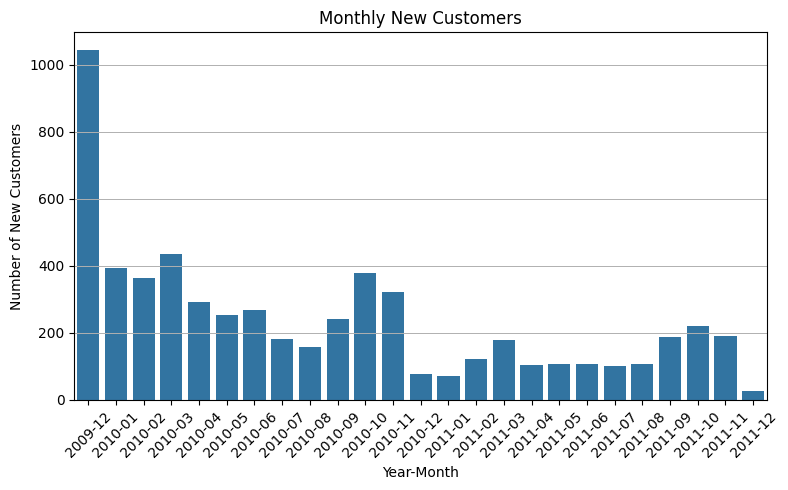

In [162]:
plt.figure(figsize=(8, 5))
sns.barplot(data=monthly_new_customers, x='FirstPurchaseMonth', y='count', order=monthly_new_customers['FirstPurchaseMonth'])
plt.title('Monthly New Customers')
plt.xlabel('Year-Month')
plt.ylabel('Number of New Customers')
plt.grid(axis='y', linestyle='-', linewidth=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### 3-5. Activation (고객 활성화 분석)

- 모든 고객 중 첫 구매 이후 **총 구매 금액이 특정 기준 금액 (£50)** 이상인 고객을 활성화된 고객으로 정의하자.
- 전체 고객 수와 활성화된 고객 수를 비교하여 **활성화율**을 도출하자.

In [228]:
total_customers = online_retail['Customer ID'].nunique()
total_customers

5942

In [229]:
# 총 구매 금액이 특정 기준 금액 이상인 고객
total_price_customers = online_retail.groupby('Customer ID')['Total'].sum()
activated_customers = total_price_customers[total_price_customers >= 50]
activated_customers

Customer ID
12347    5633.32
12348    2019.40
12349    4404.54
12350     334.40
12351     300.93
          ...   
18283    2736.65
18284     436.68
18285     427.00
18286    1188.43
18287    4177.89
Name: Total, Length: 5777, dtype: float64

In [230]:
activated_customers = len(activated_customers)
activated_customers

5777

In [234]:
# 고객 활성화율
activation_rate = (activated_customers / total_customers) * 100
activation_rate

97.22315718613261

In [235]:
print(f"총 고객 수: {total_customers}")
print(f"활성화된 고객 수: {activated_customers}")
print(f"고객 활성화율: {activation_rate:.2f}%")

총 고객 수: 5942
활성화된 고객 수: 5777
고객 활성화율: 97.22%


#### 4-6. Retention: 코호트 분석(고객)

- 분기별 활성 사용자(MAU)를 분석하여 고객 유지 현황을 파악하세요.
- 분기별 활성 고객 수를 계산하고, 이를 시각화하여 **고객 유지 트렌드**를 분석하세요.

In [238]:
online_retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824364 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      824364 non-null  object        
 1   StockCode    824364 non-null  object        
 2   Description  824364 non-null  object        
 3   Quantity     824364 non-null  int64         
 4   InvoiceDate  824364 non-null  datetime64[ns]
 5   Price        824364 non-null  float64       
 6   Customer ID  824364 non-null  int64         
 7   Country      824364 non-null  object        
 8   Total        824364 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 62.9+ MB


In [207]:
# 월 기준으로 분기 뽑기
online_retail['Quarter'] = online_retail['InvoiceDate'].dt.to_period('Q')

In [ ]:
# 활성 고객 필터링
total_price_customers = online_retail.groupby('Customer ID')['Total'].sum()
activated_customers = total_price_customers[total_price_customers >= 50].index
df_active = online_retail[online_retail['Customer ID'].isin(activated_customers)].copy()

# Cohort 지정
df_active['Cohort'] = df_active.groupby('Customer ID')['Quarter'].transform('min')

In [210]:
df_active['Customer ID'].nunique()

5777

In [201]:
# Cohort Index 계산
df_active['CohortIndex'] = (
    (df_active['Quarter'].dt.year - df_active['Cohort'].dt.year) * 4 +
    (df_active['Quarter'].dt.quarter - df_active['Cohort'].dt.quarter)
)

# 코호트 테이블 생성
cohort_data = df_active.groupby(['Cohort', 'CohortIndex'])['Customer ID'].nunique().reset_index()
cohort_counts = cohort_data.pivot(index='Cohort', columns='CohortIndex', values='Customer ID')

# 리텐션율 계산
cohort_sizes = cohort_counts.iloc[:, 0]
retention = cohort_counts.divide(cohort_sizes, axis=0) * 100


In [218]:
retention

CohortIndex,0,1,2,3,4,5,6,7,8
Cohort,,,,,,,,,
2009Q4,100.0,65.683382,67.354966,60.766962,69.813176,51.524090,50.835792,50.049164,56.145526
2010Q1,100.0,52.690972,49.739583,52.604167,36.111111,37.326389,38.541667,35.329861,NaN
2010Q2,100.0,41.116751,44.162437,23.096447,31.091371,28.807107,30.964467,NaN,NaN
2010Q3,100.0,48.932384,26.334520,27.580071,34.163701,33.451957,NaN,NaN,NaN
2010Q4,100.0,21.928666,25.759577,21.400264,36.195509,NaN,NaN,NaN,NaN
2011Q1,100.0,43.089431,33.875339,36.856369,NaN,NaN,NaN,NaN,NaN
2011Q2,100.0,44.904459,40.445860,NaN,NaN,NaN,NaN,NaN,NaN
2011Q3,100.0,53.213368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011Q4,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cohort_counts = df.groupby(['cohort_month', 'cohort_index'])['user_id'].nunique()
cohort_counts_df = cohort_counts.to_frame().rename(columns={'user_id':'users'}).sort_values(by=['cohort_month'])
cohort_counts_df['retention_rate'] = cohort_counts_df['users'] / cohort_counts_df.groupby(["cohort_month"])["users"].transform("max")
cohorts_pivot = cohort_counts_df.pivot_table(index='cohort_month', columns = 'cohort_index', values = 'retention_rate')
cohorts_pivot

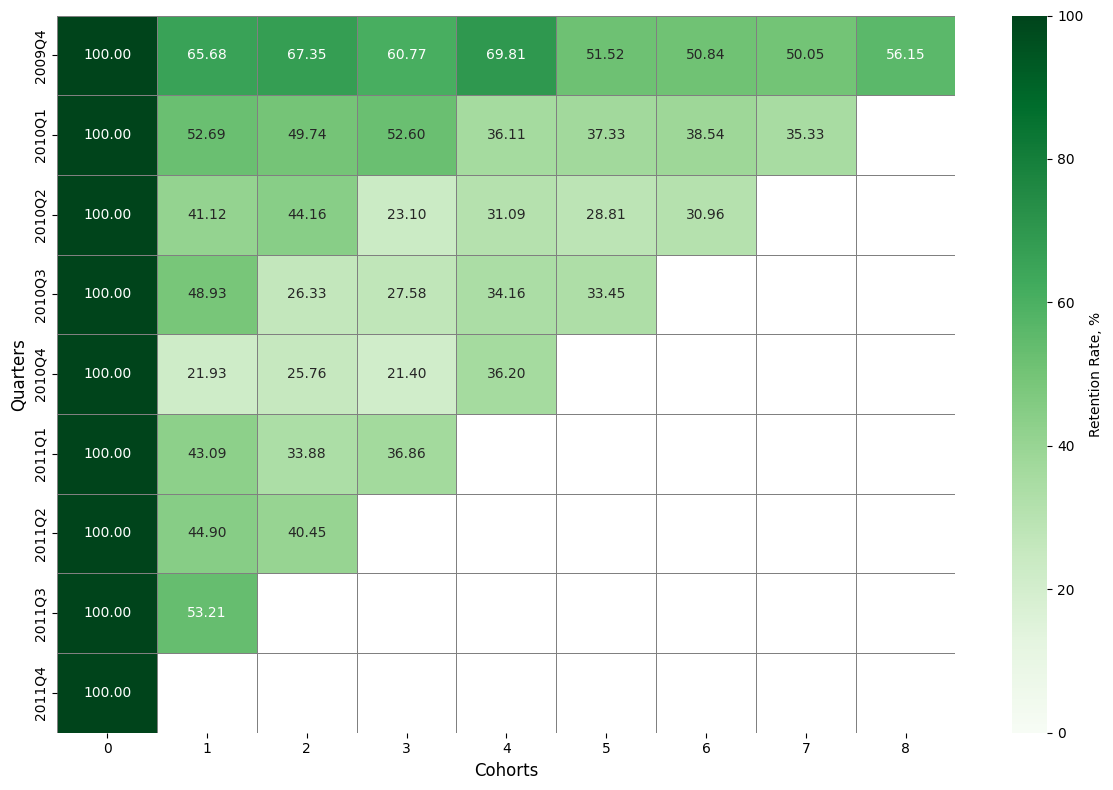

In [206]:
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(
    data=retention,
    annot=True,              
    fmt='.2f',                
    cmap='Greens',            
    cbar_kws={'label': 'Retention Rate, %'},
    linewidths=0.5,          
    linecolor='gray',          
    vmin=0, vmax=100      
)

plt.xlabel('Cohorts', fontsize=12)
plt.ylabel('Quarters', fontsize=12)
plt.tight_layout()
plt.show()


In [237]:
total_price_customers4

,Customer ID,Total
0,12346,-64.68
1,12347,5633.32
2,12348,2019.40
3,12349,4404.54
4,12350,334.40
...,...,...
5937,18283,2736.65
5938,18284,436.68
5939,18285,427.00
5940,18286,1188.43


#### 3-9. Revenue(CLV)
- 고객 생애 가치를 예측하기 위해 **CLV**를 계산하고 표로 CLV기준으로 내림차순으로 정렬해라.
- **CLV 식: 평균금액 x  평균 구매 빈도 x 고객유지기간**(단, Invoce Date의 최대 최소를 빼준 뒤 1을 더해주기)

In [251]:
customer_data = online_retail.groupby('Customer ID').agg({
    'Invoice': 'nunique',        # 구매 횟수
    'Total': 'sum',           # 총 지출 금액
}).reset_index()

first_purchase = online_retail.groupby('Customer ID')['InvoiceDate'].min()
last_purchase = online_retail.groupby('Customer ID')['InvoiceDate'].max()
lifespan_days = (last_purchase - first_purchase).dt.days + 1
customer_data = customer_data.merge(lifespan_days, on='Customer ID', how='left')
customer_data

In [248]:
total_revenue = online_retail.groupby('Customer ID')['Total'].sum()
frequency = online_retail.groupby('Customer ID')['Invoice'].nunique()

first_purchase = online_retail.groupby('Customer ID')['InvoiceDate'].min()
last_purchase = online_retail.groupby('Customer ID')['InvoiceDate'].max()
lifespan_days = (last_purchase - first_purchase).dt.days + 1
clv = (total_revenue / frequency) * frequency * lifespan_days

clv_df = pd.DataFrame({
    'Customer ID': total_revenue.index,
    'CLV': clv,
    'Total Revenue': total_revenue,
    'Frequency': frequency,
    'Customer Lifespan (days)': lifespan_days
})

clv_df = clv_df.sort_values(by='CLV', ascending=False).reset_index(drop=True)
clv_df

,Customer ID,CLV,Total Revenue,Frequency,Customer Lifespan (days)
0,18102,4.420810e+08,598215.22,153,739
1,14646,3.851798e+08,523342.07,164,736
2,14156,2.161957e+08,296564.69,202,729
3,14911,1.994434e+08,270248.53,510,738
4,13694,1.396843e+08,190825.52,164,732
...,...,...,...,...,...
5937,14213,-3.934260e+04,-1192.20,2,33
5938,13776,-8.674335e+04,-340.17,8,255
5939,13091,-9.258642e+04,-130.22,6,711
5940,15413,-7.821964e+05,-2531.38,7,309


#### 4-10. 기초통계 문제 1

- 어떤 회사의 고객 대기시간은 5분에서 15분 사이의 균등분포를 따른다. 고객 100명이 대기한 시간을 시뮬레이션하고, 평균 대기시간과 표준편차를 계산하라. 

In [172]:
waiting_times = np.random.uniform(5, 15, size=100)

# 평균과 표준편차 계산
mean_waiting_time = np.mean(waiting_times)
std_waiting_time = np.std(waiting_times)

# 결과 출력
print(f"평균 대기시간: {mean_waiting_time:.2f}")
print(f"표준편차: {std_waiting_time:.2f}")

평균 대기시간: 10.49
표준편차: 3.12


#### 4-11. 기초통계 문제 2
- 한 신제품의 초기 성공 확률이 0.3이라고 가정한다. 10회의 시뮬레이션에서 성공한 횟수를 구하고, 각 성공 여부를 출력해라.

In [174]:
outcomes = np.random.binomial(1, 0.3, size=10)
success_count = np.sum(outcomes)

print(f"각 시도 결과: {outcomes}")
print(f"성공 횟수: {success_count}")

각 시도 결과: [0 0 0 0 1 1 0 0 0 0]
성공 횟수: 2


#### 4-12. 기초통계 문제 3
- 한 수업에서 학생 20명이 5문제로 구성된 퀴즈를 치른다. 각 문제의 정답 확률은 0.7이라고 가정할 때, 각 학생이 맞힌 점수를 시뮬레이션하고, 전체 학생의 평균 점수를 계산해라.

In [175]:
scores = np.random.binomial(5, 0.7, size=20)
average_score = np.mean(scores)

print(f"학생별 점수: {scores}")
print(f"평균 점수: {average_score:.2f}")

학생별 점수: [4 3 4 5 4 2 3 4 4 4 2 3 4 4 4 4 2 4 4 4]
평균 점수: 3.60


#### 4-13. 기초통계 문제 4
- 한 공장에서 생산되는 제품의 무게는 평균 50g, 표준편차 5g의 정규분포를 따른다. 1000개의 제품 무게를 시뮬레이션하고, 무게가 45g 이상 55g 이하인 제품의 비율을 계산(변수명: within_range)하라. 무게 분포의 히스토그램을 그려라.


In [ ]:
!pip install scipy

45g 이상 55g 이하 비율: 0.68


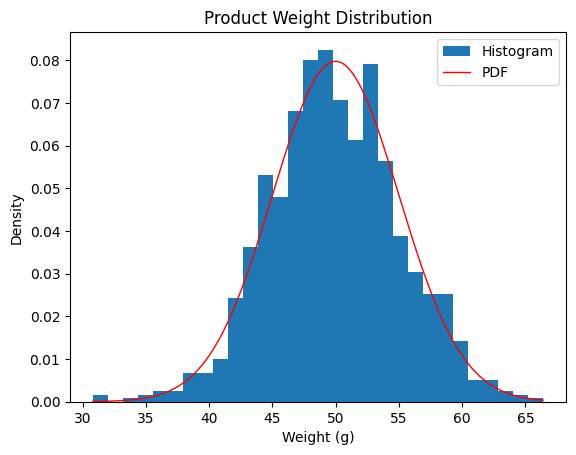

In [196]:
weights = np.random.normal(loc=50, scale=5, size=1000)

within_range = np.mean((weights >= 45) & (weights <= 55))
print(f"45g 이상 55g 이하 비율: {within_range:.2f}")

x = np.linspace(weights.min(), weights.max(), 500) 
pdf = norm.pdf(x, loc=50, scale=5)

plt.hist(weights, bins=30, density=True, label='Histogram')
plt.plot(x, pdf, color='red', linewidth=1, label='PDF')
plt.title('Product Weight Distribution')
plt.xlabel('Weight (g)')
plt.ylabel('Density')
plt.legend() 
plt.show()

### 4. KPT (회고)

- 오늘 특히 느낀 것은, 분석 결과는 분석가가 어디에 초점을 맞추느냐에 따라 크게 달라질 수 있다는 점이다. 전체적인 틀과 흐름은 정해져 있지만, 어떤 요소를 더 중요하게 보고 해석하고 결과를 도출하느냐에 따라 최종 인사이트가 완전히 달라질 수 있다는 것을 실감했다. 비록 시간이 없어서 나는 추가 정보를 제시하는 결과를 추출하지 못했지만, 다음에는 이 부분에 초점을 맞춰 데이터 분석을 해봐야겠다는 생각을 하였다.

- 또한 알고리즘을 짜는 능력이 중요한 것 같다. 이러한 자료가 있으면 좋겠다~ 라는 생각도 좋지만, 현실에서 실현해야되지 않겠는가? 아이디어는 좋으나 이를 뒷받침할만한 능력이 없으면 무용지물이 되는 것 같다.

|kpt|회고|
|---|---|
|Keep|문제를 풀기 전 어떻게 풀 건지 대충이라도 흐름을 잡아서 코드를 작성해본 점|
|Practice|1. 시각화 할 때 더 가독성 있게 보여주고 싶은데 기능들을 자세히 몰라서 사용하지 못했음. <br>2. 한 문제가 안 풀려서 그 문제만 계속 잡고 있었음. 시간이 절대적으로 부족했다. <br> -> 다른 문제에 손을 못댔다. <br> 문제를 완벽히 이해한 줄 알았으나 틀린 점이 있었다.|
|Try|알고리즘에 대해 더 생각해보고 체계적으로 코드를 짜는 연습이 중요할 것 같다. <br> 문제 이해도 중요함. <br> 중요!! 일단 안 풀리는 문제가 있으면 다음 것부터 풀자.  |